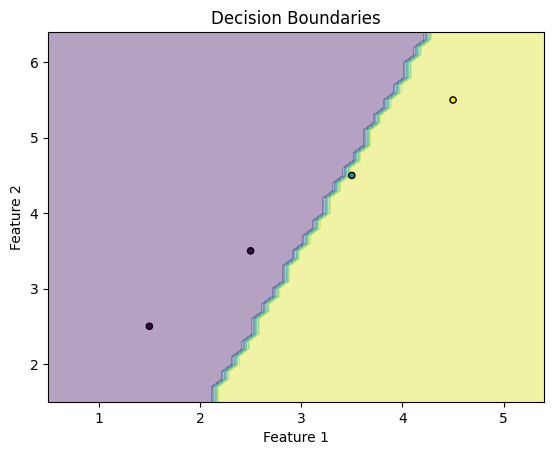

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.classifiers = {}

        for c in self.classes:
            binary_y = np.where(y == c, 1, 0)
            self.classifiers[c] = self.train_binary(X, binary_y)

    def train_binary(self, X, y):
        m, n = X.shape
        weights = np.zeros(n)
        bias = 0

        for _ in range(self.num_iterations):
            z = np.dot(X, weights) + bias
            h = self.sigmoid(z)
            loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

            dw = 1/m * np.dot(X.T, (h - y))
            db = 1/m * np.sum(h - y)

            weights -= self.learning_rate * dw
            bias -= self.learning_rate * db

        return (weights, bias)

    def predict(self, X):
        predictions = []
        for i, x in enumerate(X):
            max_score = float('-inf')
            predicted_class = None
            for c in self.classes:
                weights, bias = self.classifiers[c]
                score = np.dot(x, weights) + bias
                if score > max_score:
                    max_score = score
                    predicted_class = c
            predictions.append(predicted_class)
        return np.array(predictions)

    def decision_boundary(self, x):
        decision_boundaries = {}
        for c in self.classes:
            weights, bias = self.classifiers[c]
            decision_boundaries[c] = (-bias - weights[0]*x) / weights[1]
        return decision_boundaries

# Example usage:
# Assuming X_train and y_train are your training data
X_train = np.array([[2.5, 3.5], [1.5, 2.5], [3.5, 4.5], [4.5, 5.5]])
y_train = np.array([0, 0, 1, 2])  # Assuming 3 classes

# Initialize and train the logistic regression model
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

# Define the decision boundary range
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

# Generate a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the classes for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries')
plt.show()
